<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setting-up-Environment" data-toc-modified-id="Setting-up-Environment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setting up Environment</a></span></li><li><span><a href="#Importing-Dataset" data-toc-modified-id="Importing-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Dataset</a></span><ul class="toc-item"><li><span><a href="#Data-Pre-processing" data-toc-modified-id="Data-Pre-processing-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Pre-processing</a></span></li></ul></li><li><span><a href="#Function-Declarations" data-toc-modified-id="Function-Declarations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Function Declarations</a></span></li><li><span><a href="#Wikipedia-corpus" data-toc-modified-id="Wikipedia-corpus-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Wikipedia corpus</a></span><ul class="toc-item"><li><span><a href="#Wikipedia-corpus-food" data-toc-modified-id="Wikipedia-corpus-food-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Wikipedia corpus food</a></span></li><li><span><a href="#Wikipedia-corpus-cuisine" data-toc-modified-id="Wikipedia-corpus-cuisine-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Wikipedia corpus cuisine</a></span></li></ul></li><li><span><a href="#Dummy-Food" data-toc-modified-id="Dummy-Food-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dummy Food</a></span><ul class="toc-item"><li><span><a href="#Dummy-Food-names" data-toc-modified-id="Dummy-Food-names-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Dummy Food names</a></span></li><li><span><a href="#Dummy-Food-Cuisine" data-toc-modified-id="Dummy-Food-Cuisine-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Dummy Food Cuisine</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Viewing-Labelled-Dataset" data-toc-modified-id="Viewing-Labelled-Dataset-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Viewing Labelled Dataset</a></span></li><li><span><a href="#Verifying-Representation-of-each-Influencer" data-toc-modified-id="Verifying-Representation-of-each-Influencer-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Verifying Representation of each Influencer</a></span></li></ul></li><li><span><a href="#Pareto-Analysis-for-Supplementary-Labelling" data-toc-modified-id="Pareto-Analysis-for-Supplementary-Labelling-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Pareto Analysis for Supplementary Labelling</a></span><ul class="toc-item"><li><span><a href="#EDA-on-sheeatsshecooks" data-toc-modified-id="EDA-on-sheeatsshecooks-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>EDA on <code>sheeatsshecooks</code></a></span></li><li><span><a href="#Data-Clearning" data-toc-modified-id="Data-Clearning-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Data Clearning</a></span></li><li><span><a href="#Word-Frequency" data-toc-modified-id="Word-Frequency-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Word Frequency</a></span></li><li><span><a href="#Pareto-Corpus-Food-and-Cuisine-Labelling" data-toc-modified-id="Pareto-Corpus-Food-and-Cuisine-Labelling-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Pareto Corpus Food and Cuisine Labelling</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Verifying-Representation-of-each-Influencer" data-toc-modified-id="Verifying-Representation-of-each-Influencer-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Verifying Representation of each Influencer</a></span></li></ul></li><li><span><a href="#Exporting-Dataset" data-toc-modified-id="Exporting-Dataset-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Exporting Dataset</a></span></li></ul></div>

# Setting up Environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Importing Dataset

In [2]:
filepath = "../Instagram/Cleaned data/"
filename = "All_posts.csv"

In [3]:
df = pd.read_csv(filepath + filename)
df.head()

,timestamp,Username,caption,no. of likes,no. of comments,comments
0,30/6/2020,8days_eat,Katong’s famous Hokkien mee and fried mee sua ...,326,7,"['@lauren.khoury still can’t crack a smile 😬',..."
1,30/6/2020,8days_eat,"For the first time in Singapore, Heytea will b...",258,3,"['Awesomeeeee neeed this now', '@becauseitsdon..."
2,29/6/2020,8days_eat,Korean “fat-carons” — supersized macarons stuf...,453,3,['#8dayseat #sgfoodies #instafood #yum #sgfood...
3,29/6/2020,8days_eat,Online ordering system Oddle has launched a ne...,287,3,"['THANK YOU 👀📸🔥', 'Absolutely love this tinkat..."
4,29/6/2020,8days_eat,A canelé is a bite-sized French pastry from Bo...,431,3,"['@jet8food , I see it! 😁', '@brave_nic', '🙏🏼💗💗']"


In [4]:
numposts = df.shape[0]

## Data Pre-processing

We will conduct the following pre-processing steps for our dataset:

1. Create an unique ID to easily identify posts.
2. Convert all captions to lower case such that food names can be detected as all the names in our corpus are lower case names.
3. Removal of giveaways posts by changing the caption to "giveaway". In such posts, the influencer asks followers to participate in a lucky draw by liking and/or commenting on the post. These posts artificially inflate the numbers of likes and comments and hence perceived popularity of the food.

In [5]:
df["ID"] = df.index

In [6]:
df["caption"] = df["caption"].apply(lambda x: x.lower())
df.head()

,timestamp,Username,caption,no. of likes,no. of comments,comments,ID
0,30/6/2020,8days_eat,katong’s famous hokkien mee and fried mee sua ...,326,7,"['@lauren.khoury still can’t crack a smile 😬',...",0
1,30/6/2020,8days_eat,"for the first time in singapore, heytea will b...",258,3,"['Awesomeeeee neeed this now', '@becauseitsdon...",1
2,29/6/2020,8days_eat,korean “fat-carons” — supersized macarons stuf...,453,3,['#8dayseat #sgfoodies #instafood #yum #sgfood...,2
3,29/6/2020,8days_eat,online ordering system oddle has launched a ne...,287,3,"['THANK YOU 👀📸🔥', 'Absolutely love this tinkat...",3
4,29/6/2020,8days_eat,a canelé is a bite-sized french pastry from bo...,431,3,"['@jet8food , I see it! 😁', '@brave_nic', '🙏🏼💗💗']",4


In [7]:
# Viewing giveaway posts
for i in range(len(df)):
    if "giveaway" in df["caption"][i]:
        print(df["caption"][i])
        print('------------------')

[giveaway closed] win yourself a box of hai chi jia's suan la fen (6 cups) and have it delivered to you courtesy of asia's best!

all you’ve got to do is:⁣⁣
1. like this post and follow ⁣@asiasbestco
2. tag 2 friends who really need this!⁣⁣
⁣⁣
3 x lucky winners will be sent a carton of hai chi jia suan la fen noodles.
⁣⁣
enjoy the free shipping promo and special price of $16.90 when you purchase hai chi jia noodles from now till 30 june 👉https://asiasbest.co or link in bio.

receive it in just 1-2 days if it is in stock when you order, so be quick as we hear it is selling very very fast!
—⁣⁣
📷: @chingqingbear
—
[winners: @stafenie_wang @jowiee_x @wolfberree]
------------------
[giveaway closed] win yourself a box of hai chi jia's suan la fen (6 cups) and have it delivered to you courtesy of asia's best!

all you’ve got to do is:⁣⁣
1. like this post and follow ⁣@asiasbestco
2. tag 2 friends who really need this!⁣⁣
⁣⁣
3 x lucky winners will be sent a carton of hai chi jia suan la fen noo

In [8]:
# Renaming captions for giveaway posts
for i in range(len(df)):
    if "giveaway" in df["caption"][i]:
        df["caption"][i] = "giveaway"

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Function Declarations

In [9]:
def label_from_df_column(df_corpus, name_col, search_col):
    def helper(caption):
        if not caption: # checks if caption is blank
            return
        for i in range(len(df_corpus[search_col])):
            food = df_corpus[search_col][i]
            if food in caption:
                return df_corpus[name_col][i]

        # food not found
        return
    return helper

# Wikipedia corpus

In [10]:
corpusname = "2wikipedia"

In [11]:
df_corpus = pd.read_csv(filepath + "../"+ "corpus_wikipedia.csv")  
df_corpus.head()

,Food,Cuisine,alternative names
0,bak kut teh,Chinese,bak kut teh
1,beef kway teow,Chinese,beef kway teow
2,bak chang,Chinese,bak chang
3,bak chor mee,Chinese,bak chor mee
4,ban mian,Chinese,ban mian


In [12]:
df_corpus.shape

(201, 3)

## Wikipedia corpus food

In [13]:
df["food"] = df["caption"].apply(label_from_df_column(df_corpus, "alternative names", "Food"))

## Wikipedia corpus cuisine

In [14]:
df["cuisine"] = df["food"].apply(label_from_df_column(df_corpus, "Cuisine", "Food"))

# Dummy Food

## Dummy Food names

In [15]:
# corpusname = "1dummyfood"

todo: replace with real food names

In [16]:
# # Set seed for reproducibility
# np.random.seed(0)

In [17]:
# df["food"] = np.char.add(np.array(["food "]*numposts), np.random.randint(10, size=numposts).astype('str'))
# df.head()

## Dummy Food Cuisine

In [18]:
# food_corpus = df["food"].unique()
# food_corpus

In [19]:
# cuisines_corpus = {"cuisine1": ['food 1', 'food 2', 'food 3'],
#                    "cuisine2": ['food 4', 'food 5'],
#                    "cuisine3": ['food 6'],
#                    "cuisine4": ['food 7', 'food 8', 'food 9']
#                   }

In [20]:
# def get_cuisine(food):
#     for cuisine, foods in cuisines_corpus.items():
#         if food in foods:
#             return cuisine
#     return "No cuisine found"

In [21]:
# df['cuisine'] = df["food"].apply(get_cuisine)
# df.head()

# Evaluation

## Viewing Labelled Dataset

In [22]:
df[["caption", "food", "cuisine"]]

,caption,food,cuisine
0,katong’s famous hokkien mee and fried mee sua ...,hokkien mee,Chinese
1,"for the first time in singapore, heytea will b...",None,None
2,korean “fat-carons” — supersized macarons stuf...,acar,Malay
3,online ordering system oddle has launched a ne...,None,None
4,a canelé is a bite-sized french pastry from bo...,None,None
...,...,...,...
1035,butadon with egg.\r\n\r\nwhen you see shabu sh...,udon,Japanese
1036,here’s a recap of that famous grilled cheese s...,None,None
1037,a healthy sunday start with chobani greek yogh...,None,None
1038,crispy salmon in vegetable broth.\r\n\r\nthank...,None,None


In [23]:
df[~df["food"].isna()]

,timestamp,Username,caption,no. of likes,no. of comments,comments,ID,food,cuisine
0,30/6/2020,8days_eat,katong’s famous hokkien mee and fried mee sua ...,326,7,"['@lauren.khoury still can’t crack a smile 😬',...",0,hokkien mee,Chinese
2,29/6/2020,8days_eat,korean “fat-carons” — supersized macarons stuf...,453,3,['#8dayseat #sgfoodies #instafood #yum #sgfood...,2,acar,Malay
5,29/6/2020,8days_eat,"@7elevensg now has $2, $3 and $4 all-day break...",148,0,[],5,kopi,Drinks and beverages
15,23/6/2020,8days_eat,breaking news: nine-year-old french patisserie...,647,15,"['Omg @xin_yx', 'When is the last day?', '@car...",15,yong tau foo,Chinese
21,21/6/2020,8days_eat,tapow feast from @fullertonhotelsg ”dine at ho...,243,1,['Looks so good!! 😍😍'],21,hainanese chicken rice,Chinese
...,...,...,...,...,...,...,...,...,...
996,3/6/2020,thesilverchef,after cooking exclusively at home and making a...,359,4,['Even outside food you make it so yummyliciou...,996,bak kut teh,Chinese
1005,31/5/2020,thesilverchef,butadon with egg.\r\n\r\nwhen you see shabu sh...,1192,18,"['Yum yum in my tum 😍', 'Can you use beef inst...",1005,udon,Japanese
1016,6/6/2020,thesilverchef,"japanese kare udon, curry noodles.\r\n\r\nhere...",447,2,['😋😋'],1016,udon,Japanese
1026,3/6/2020,thesilverchef,after cooking exclusively at home and making a...,359,4,['Even outside food you make it so yummyliciou...,1026,bak kut teh,Chinese


In [24]:
print(df["food"].unique())
print(df["food"].nunique())

['hokkien mee' None 'acar' 'kopi' 'yong tau foo' 'hainanese chicken rice'
 'bak chang' 'tofu' 'kuih' 'ramen' 'pulut hitam' 'edamame' 'milo'
 'biryani' 'korean fried chicken' 'char kway teow' 'gyoza' 'mee pok'
 'sashimi' 'tonkatsu' 'duck rice' 'roti prata' 'teochew porridge'
 'chai tow kway' 'satay' 'chilli crab' 'assam pedas' 'appam' 'sambal'
 'oden' 'hum chim peng' 'dosa' 'udon' 'char siu' 'curry puff'
 'shabu shabu' 'bubur cha cha' 'sukiyaki' 'keropok' 'sushi'
 'har cheong gai' 'cereal prawns' 'rawon' 'soto' 'oyster omelette'
 'bandung' 'bak kut teh' 'yakitori' 'popiah' 'frog leg porridge'
 'ban mian' 'curry rice' 'horlicks' 'crab bee hoon' 'fish head curry'
 'mee siam' 'chawanmushi' 'tempura' 'ketupat' 'rojak']
59


In [25]:
print(df["cuisine"].unique())
print(df["cuisine"].nunique())

['Chinese' None 'Malay' 'Drinks and beverages' 'Japanese' 'Desserts'
 'Cross-cultural' 'Korean' 'Indian' 'Seafood']
9


In [26]:
df[df["cuisine"] == 'Cross-cultural']["food"].unique()

array(['biryani', 'cereal prawns', 'fish head curry', 'mee siam', 'rojak'],
      dtype=object)

## Verifying Representation of each Influencer

We shall now attempt to check if every influencer is being equally represented by our chosen corpus. This is done by checking the percentage of the influencer's posts that are being labelled by the corpus.

In [27]:
df_influencers = df["Username"].value_counts().reset_index()
df_influencers.columns = ["Username", "no. of posts"]
df_influencers["no. of labelled posts"] = df[~df["food"].isna()]["Username"].value_counts().values
df_influencers["representation %"] = df_influencers["no. of labelled posts"] / df_influencers["no. of posts"] *100

df_influencers

,Username,no. of posts,no. of labelled posts,representation %
0,thesilverchef,251,48,19.123506
1,sgfoodonfoot,122,33,27.049180
2,stormscape,105,30,28.571429
3,fundamentally_flawed,98,24,24.489796
4,sethluicious,94,24,25.531915
5,misstamchiak,79,22,27.848101
6,8days_eat,68,19,27.941176
7,danielfooddiary,54,18,33.333333
8,foodkingnoc,48,15,31.250000
9,ieatishootipost,47,15,31.914894


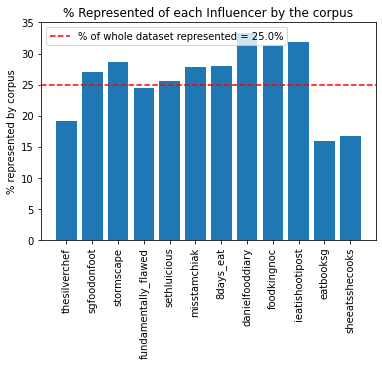

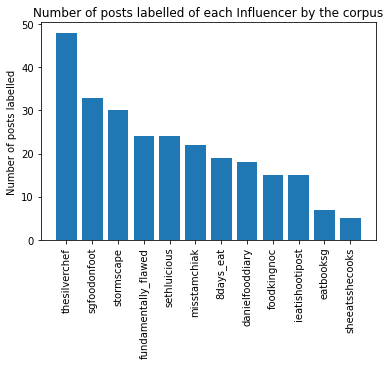

In [28]:
plt.bar(df_influencers["Username"], df_influencers["representation %"])
plt.axhline(len(df[~df["food"].isna()])/len(df)*100, color="r",\
            label="% of whole dataset represented = "+str(len(df[~df["food"].isna()])/len(df)*100)+"%", ls='--')
plt.title("% Represented of each Influencer by the corpus")
plt.xticks(rotation=90)
plt.ylabel("% represented by corpus")
plt.legend()
plt.show()

plt.bar(df_influencers["Username"], df_influencers["no. of labelled posts"])
plt.title("Number of posts labelled of each Influencer by the corpus")
plt.xticks(rotation=90)
plt.ylabel("Number of posts labelled")
plt.show()

From the above plot, we found out that the influencer ```sheeatsshecooks``` is severely under-represented by the chosen corpus. We shall now investigate further and update the corpus with food names used by ```sheeatsshecooks```.

Although ```thesilverchef``` is the second most under-represented influencer, ```thesilverchef``` already have the most labelled posts, and further attention to label ```thesilverchef```'s posts will probably not change the conclusion. Hence, we will focus our efforts on increasing the representation of ```sheeatsshecooks```.

# Pareto Analysis for Supplementary Labelling

## EDA on ```sheeatsshecooks```

In [29]:
for c in df[df["Username"] == "sheeatsshecooks"]["caption"]:
    print(c)
    print('-------------------------')

homemade lobster mac & cheese using a diy set
-------------------------
aburi unagi & pork don, spicy salmon poke bowl & gyoza - to help out their tenants @guocotower is offering free delivery this covid period
-------------------------
organic roast chicken stuffed with lemon, onion, bacon, juniper berries & rosemary on a bed of roasted apples & carrots - you can taste the difference in these organic free range chickens raised by @bostockbrothers grazing on certified organic grass and apples. got these from the guys @meatcosg & are the perfect meat for a dinner party
-------------------------
giveaway
-------------------------
harissa grilled prawns with a tahini kale salad - a simple marinade of olive oil, salt, pepper, paprika & harissa paste then grilled. these tiger prawns were juicy, sweet and delivered
-------------------------
heading back to work with these healthy bowls with delicious vegetarian & meat options - as a bonus $1 from every bowl is donated to down syndrome associ

## Data Clearning

In [30]:
txt = df[df["Username"] == "sheeatsshecooks"]["caption"].values.tolist()
txt

['homemade lobster mac & cheese using a diy set',
 'aburi unagi & pork don, spicy salmon poke bowl & gyoza - to help out their tenants @guocotower is offering free delivery this covid period',
 'organic roast chicken stuffed with lemon, onion, bacon, juniper berries & rosemary on a bed of roasted apples & carrots - you can taste the difference in these organic free range chickens raised by @bostockbrothers grazing on certified organic grass and apples. got these from the guys @meatcosg & are the perfect meat for a dinner party',
 'giveaway',
 'harissa grilled prawns with a tahini kale salad - a simple marinade of olive oil, salt, pepper, paprika & harissa paste then grilled. these tiger prawns were juicy, sweet and delivered',
 'heading back to work with these healthy bowls with delicious vegetarian & meat options - as a bonus $1 from every bowl is donated to down syndrome association singapore',
 'gorgeous acai bowls to start the day - these are great healthy ones not loaded with suga

We will do some simple data cleaning to make the results of our analysis more reliable. The data cleaning steps we will take are as follows:

1. Use a regular expression to remove any punctuation
2. Check that all text are already in lower case
3. Remove stop words

In [31]:
# Load the regular expression library
import re

# Remove punctuation
txt = list(map(lambda x: re.sub('[,\.!?@]', '', x), txt))
txt = list(map(lambda x: re.sub('[()\r\n]', ' ', x), txt))

# # Convert the titles to lowercase
# txt = txt.map(lambda x: x.lower())

# View our results
txt

['homemade lobster mac & cheese using a diy set',
 'aburi unagi & pork don spicy salmon poke bowl & gyoza - to help out their tenants guocotower is offering free delivery this covid period',
 'organic roast chicken stuffed with lemon onion bacon juniper berries & rosemary on a bed of roasted apples & carrots - you can taste the difference in these organic free range chickens raised by bostockbrothers grazing on certified organic grass and apples got these from the guys meatcosg & are the perfect meat for a dinner party',
 'giveaway',
 'harissa grilled prawns with a tahini kale salad - a simple marinade of olive oil salt pepper paprika & harissa paste then grilled these tiger prawns were juicy sweet and delivered',
 'heading back to work with these healthy bowls with delicious vegetarian & meat options - as a bonus $1 from every bowl is donated to down syndrome association singapore',
 'gorgeous acai bowls to start the day - these are great healthy ones not loaded with sugar which is su

In [32]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# stop_words = set(stopwords.words('english'))
# word_tokens = word_tokenize(txt)

# filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
# filtered_sentence = [] 
  
# for w in word_tokens: 
#     if w not in stop_words: 
#         filtered_sentence.append(w) 

## Word Frequency

In [33]:
wordlist = []
wordfreq = []

for c in txt:
    wordlist += c.split()

unique_wordlist = list(set(wordlist))
    
for w in unique_wordlist:
    wordfreq.append(wordlist.count(w))
    
df_wordsfreq = pd.DataFrame({"word": unique_wordlist,
                            "freq": wordfreq})
df_wordsfreq.sort_values("freq", ascending = False)[:20]

,word,freq
197,&,42
323,with,38
0,a,28
276,the,24
120,in,16
449,and,14
139,to,12
186,of,12
400,from,12
303,for,11


In [34]:
df_wordsfreq.describe()

,freq
count,526.000000
mean,1.847909
std,3.222490
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,42.000000


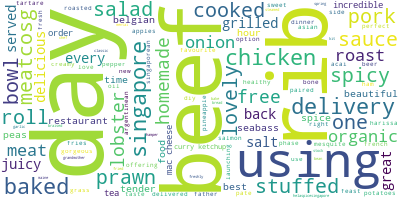

In [35]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(txt)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

Here, we rank in the words based on their relative frequency of occurence, and sieve out the words that are probably part of food names.

In [36]:
df_wordsfreq = pd.DataFrame({"word": list(wordcloud.words_.keys()),
                            "freq": list(wordcloud.words_.values())})
df_wordsfreq.sort_values("freq", ascending = False)[:20]

,word,freq
0,day,1.000000
2,rib,0.666667
1,beef,0.666667
3,using,0.555556
4,delivery,0.555556
5,chicken,0.555556
6,singapore,0.555556
7,baked,0.555556
14,one,0.444444
19,roll,0.444444


In [37]:
new_foods = ["beef", "rib", "meat", "baked", "chicken", "pork", "roll", "prawn", "cooked", "salad"]

Now that we have created a list of potential new food names to add to our corpus, we shall check if they already belong in the corpus (perhaps under a different name?). Otherwise, we will identify their full food names from the captions to add to the corpus.

In [38]:
for x in df_corpus["alternative names"]:
    for food in new_foods:
        if food in x or x in food:
            print("'" + x + "',")

'beef kway teow',
'drunken prawns',
'hainanese chicken rice',
'shredded chicken noodles',
'tandoori chicken',
'cereal prawns',
'chicken rice',
'chicken noodles',
'korean chicken skewers',
'korean fried chicken',


In [39]:
df_corpus[df_corpus["alternative names"].isin(['beef kway teow',
                                    'drunken prawns',
                                    'hainanese chicken rice',
                                    'shredded chicken noodles',
                                    'tandoori chicken',
                                    'cereal prawns',
                                    'chicken rice',
                                    'chicken noodles',])]

,Food,Cuisine,alternative names
1,beef kway teow,Chinese,beef kway teow
9,drunken prawns,Chinese,drunken prawns
15,hainanese chicken rice,Chinese,hainanese chicken rice
25,shredded chicken noodles,Chinese,shredded chicken noodles
68,tandoori chicken,Indian,tandoori chicken
72,cereal prawns,Cross-cultural,cereal prawns
113,hainanese chicken rice,Chinese,chicken rice
114,shredded chicken noodles,Chinese,chicken noodles


No naming conflicts identified

In order to identify the full food names, let us see which captions do these new food words appear in.

In [40]:
food = "meatcosg"
count = 0
for x in txt:
    if food in x or x in food:
        count += 1
        print(x)
        print()
        print('-------------')
print(count)

organic roast chicken stuffed with lemon onion bacon juniper berries & rosemary on a bed of roasted apples & carrots - you can taste the difference in these organic free range chickens raised by bostockbrothers grazing on certified organic grass and apples got these from the guys meatcosg & are the perfect meat for a dinner party

-------------
cheers to phase 2 and having four guests over for dinner with this prime rib from meatcosg served with a side salad & roasted sweet potatoes

-------------
fall-off-the-bone 4-ingredient usda stlouis ribs from meatcosg simply generously rub the rack of ribs with salt worcestershire sauce  curry ketchup  you can use normal ketchup  & mesquite spice blend from helaspicesingapore  wrap in foil and bake for 2 hours at 160c then unwrap brush a layer of desired sauce  i used curry ketchup  then bake for another 1 hour uncovered the ribs should be sticky tender juicy and falling off the bones use sheeatsshecooks10 for a discount meatcosg

-------------

In [41]:
for food in new_foods:
    print(food)
    for x in txt:
        if food in x or x in food:
            print(x)
            print()
    print('-------------')

beef
crayfish lemonade & charcuterie broth | uni chawanmushi | “cheeseburger” beef tartare | caviar bite - so happy to be able to eat out again & see chefs coming back strong

grass-fed beef tartare with crispy fries - this lovely belgian restaurant opened right before our lockdown  and will be open every day in june serving belgian classics like the delicious beef cheek carbonnade  stewed in beer  and their homemade pork pate with onion jam perfect for the recent rainy days and wholesome food cooked with belgian love brought me right back to the streets of brussels

gorgeous juicy & tender beef ribs slow cooked for 16 hours by chef paolo using his grandmother’s recipe & their incredible pork mac & cheese with guanciale and parmesan - possibly the best mac & cheese in singapore  they’re offering free delivery with any order of beef ribs and they come with lovely sides & freshly baked bread or you can order a spicy chorizo pizza like me

beef bourguignon & seabass en papillote from fleu

In [42]:
# Modify new_foods
new_foods = [["beef tartare", "Western"],
            ["rib", "Western"],
            ["roast chicken", "Western"],
            ["wagyu", "Japanese"],
            ["scones", "Snacks"],
            ["cookies", "Snacks"],
            ["salted egg", "Snacks"],
            ["unagi", "Japanese"],
            ["poke bowl", "Japanese"],
            ["gyoza", "Japanese"]]

Now we shall check if these new food names already appear in the corpus.

In [43]:
for x in df_corpus["alternative names"]:
    for food in new_foods:
        if food[0] in x or x in food:
            print("'" + x + "',")

'unagi no kabayaki',
'gyoza',


Seems like there are some food already in our corpus, let's remove gyoza and add unagi as an alternative name.

In [44]:
df_corpus[df_corpus["alternative names"]=='unagi no kabayaki']

,Food,Cuisine,alternative names
149,unagi no kabayaki,Japanese,unagi no kabayaki


In [45]:
# Modify new_foods
new_foods = [["beef tartare", "Western"],
            ["rib", "Western"],
            ["roast chicken", "Western"],
            ["wagyu", "Japanese"],
            ["scones", "Snacks"],
            ["cookies", "Snacks"],
            ["salted egg", "Snacks"],
            ["poke bowl", "Japanese"]]

In [46]:
df_new_food = pd.DataFrame(new_foods, columns=["Food", "Cuisine"])
df_new_food["alternative names"] = df_new_food["Food"]

# Adding unagi as an alternative name
df_new_food = df_new_food.append(pd.DataFrame([["unagi no kabayaki", "Japanese", "unagi"]],
                                              columns = ["Food", "Cuisine", "alternative names"]), ignore_index=True)
df_new_food

,Food,Cuisine,alternative names
0,beef tartare,Western,beef tartare
1,rib,Western,rib
2,roast chicken,Western,roast chicken
3,wagyu,Japanese,wagyu
4,scones,Snacks,scones
5,cookies,Snacks,cookies
6,salted egg,Snacks,salted egg
7,poke bowl,Japanese,poke bowl
8,unagi no kabayaki,Japanese,unagi


In [47]:
# Adding more alternative names
df_new_food = df_new_food.append(pd.DataFrame([["rib", "Western", "ribeye"],
                                 ["rib", "Western", "ribs"],
                                 ["roast chicken", "Western", "fried chicken"]],
                                columns=["Food", "Cuisine", "alternative names"], dtype="str"), ignore_index=True)
df_new_food

,Food,Cuisine,alternative names
0,beef tartare,Western,beef tartare
1,rib,Western,rib
2,roast chicken,Western,roast chicken
3,wagyu,Japanese,wagyu
4,scones,Snacks,scones
5,cookies,Snacks,cookies
6,salted egg,Snacks,salted egg
7,poke bowl,Japanese,poke bowl
8,unagi no kabayaki,Japanese,unagi
9,rib,Western,ribeye


In [48]:
df_corpus = df_corpus.append(df_new_food, ignore_index=True)
df_corpus.shape

(213, 3)

## Pareto Corpus Food and Cuisine Labelling

In [49]:
corpusname = "3pareto"

In [50]:
df["food"] = df["caption"].apply(label_from_df_column(df_corpus, "alternative names", "Food"))
df["cuisine"] = df["food"].apply(label_from_df_column(df_corpus, "Cuisine", "Food"))

In [55]:
print("Number of distinct food names:", df_corpus["Food"].nunique())
print("Number of distinct search food names:", df_corpus.shape[0])
print("Number of distinct cuisines:", df_corpus["Cuisine"].nunique())
df_corpus["Cuisine"].value_counts()

Number of distinct food names: 182
Number of distinct search food names: 213
Number of distinct cuisines: 11


Korean                  42
Chinese                 36
Japanese                33
Malay                   32
Cross-cultural          19
Indian                  13
Drinks and beverages    13
Desserts                11
Western                  6
Seafood                  5
Snacks                   3
Name: Cuisine, dtype: int64

# Evaluation

## Verifying Representation of each Influencer

With this modification to the corpus, we shall now check if every influencer is being equally represented by our chosen corpus. This is done by checking the percentage of the influencer's posts that are being labelled by the corpus.

In [50]:
df_influencers = df["Username"].value_counts().reset_index()
df_influencers.columns = ["Username", "no. of posts"]
df_influencers["no. of labelled posts"] = df[~df["food"].isna()]["Username"].value_counts().values
df_influencers["representation %"] = df_influencers["no. of labelled posts"] / df_influencers["no. of posts"] *100

df_influencers

,Username,no. of posts,no. of labelled posts,representation %
0,thesilverchef,251,77,30.677291
1,sgfoodonfoot,122,40,32.786885
2,stormscape,105,35,33.333333
3,fundamentally_flawed,98,33,33.673469
4,sethluicious,94,33,35.106383
5,misstamchiak,79,30,37.974684
6,8days_eat,68,23,33.823529
7,danielfooddiary,54,21,38.888889
8,foodkingnoc,48,20,41.666667
9,ieatishootipost,47,20,42.553191


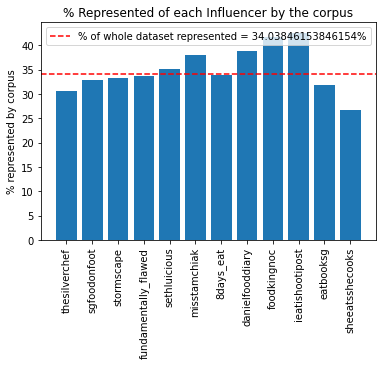

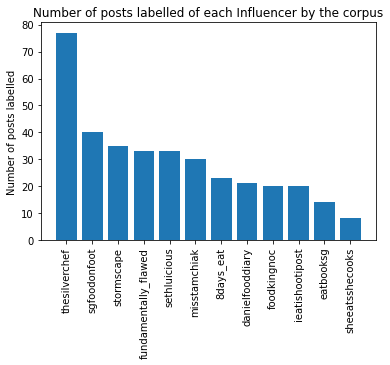

In [51]:
plt.bar(df_influencers["Username"], df_influencers["representation %"])
plt.axhline(len(df[~df["food"].isna()])/len(df)*100, color="r",\
            label="% of whole dataset represented = "+str(len(df[~df["food"].isna()])/len(df)*100)+"%", ls='--')
plt.title("% Represented of each Influencer by the corpus")
plt.xticks(rotation=90)
plt.ylabel("% represented by corpus")
plt.legend()
plt.show()

plt.bar(df_influencers["Username"], df_influencers["no. of labelled posts"])
plt.title("Number of posts labelled of each Influencer by the corpus")
plt.xticks(rotation=90)
plt.ylabel("Number of posts labelled")
plt.show()

With this addition to the corpus we have not only improved ```sheeatsshecooks```'s representation to somewhere much closer to the overall dataset's representation, we have also increased the percentage of labelled posts from 24.7% to 33.7%

# Exporting Dataset

In [52]:
df_corpus.to_csv("../Instagram/" + "corpus_wikipedia_pareto.csv", index=False)

In [53]:
df.to_csv(filepath + filename[:-4] + "_" + corpusname + ".csv", index=False)

In [57]:
for x in df[df["cuisine"] == "Korean"]['caption']:
    print(x)
    print('--------')

there’s no need to whip up your own dalgona coffee when you can simply buy the alley’s new dalgona coffee-inspired bubble tea with java foam, along with korean fried chicken from chir chir in one single delivery. click link in our profile for more details (the url starting with “linkinprofile” below our logo). 📸 the alley & chir chir chicken .
.
.
.
.
.
.
.
#8dayseat #sgfoodies #instafood #yum #sgfood #foodporn #whati8today #onthetable #igsg #food #yummyinmytum #foodgasm #igfood #sgfood #covid19 #flattenthecurve #stayhome #circuitbreaker #homedelivery #bubbletea #dalgonacoffee #koreanfriedchicken 
https://bit.ly/3dmuahp
--------
all the mukbang videos we’ve been binging on have got us craving some crispy fried chicken. here’s a list of korean fried chicken delivery options:

chir chir fusion chicken factory has a honey butter chicken ($30.30) that’s generously slathered with a rich honey butter sauce, and their og crispy fried chicken ($17.70) lives up to its name with its crunchy batt